# FinnSentiment

Neural Network implementation of sentiment analysis using **FinnSentiment** dataset from https://github.com/cynarr/sentiment-analysis/tree/master/data-raw

## 1. Binary Classifier
In this section, we will consider only 2 polarities of the comments: **positive** and **negative**.


In [176]:
# uncomment to install packages
'''
%pip install numpy
%pip install matplotlib
%pip install nltk
'''

'\n%pip install numpy\n%pip install matplotlib\n%pip install nltk\n'

In [177]:
#import essential packages for the project
import numpy as np
import matplotlib.pyplot as plt

from string import punctuation

import nltk
from nltk.tokenize import word_tokenize

%matplotlib inline


In [178]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Windows\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [179]:
print('\nPunctuation\n')
print(punctuation)


Punctuation

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [180]:
# example of how to use word_tokenize
word_tokenize('I am a girl.')

['I', 'am', 'a', 'girl', '.']

### 1.1 data preprocessing

In [181]:
# function to read data from a file
def process_data(datatype, language, label):
    '''
        input:
            - datatype: 'train' or 'test'
            - language: 'en'(English) or 'fi'(Finnish)
            - label: 'pos'(positive) or 'neg'(negative)
        output:
            - list of sentences
    '''
    filename = label + '_test.txt' if datatype=='test' else label + '.txt'
    filepath = 'data-raw/bin/' + language + '/' + datatype + '/' + filename

    with open(filepath, mode='r', encoding='utf8') as f:
        sentences = f.readlines()

    # -------------------------------------------------- data preprocessing  -------------------------------------------------- #
    data = []
    
    for sentence in sentences:
        sentence = sentence.lower() # lowercase
        sentence = sentence.replace('\n','') # remove \n  

        words = word_tokenize(sentence) # tokenisation

        # remove stop words and punctuations
        for word in words:
            if (word in list(punctuation)): 
                words.remove(word)
                
        # append list of words of a sentence to data
        data.append(words)
    # -------------------------------------------------- data preprocessing  -------------------------------------------------- #
    
    return data


In [182]:
# data preprocessing: get list of words for each sentence
train_pos = process_data('train','fi','pos')
train_neg = process_data('train','fi','neg')
test_pos = process_data('test','fi','pos')
test_neg = process_data('test','fi','neg')

print(len(train_pos), len(train_pos[0]))

2567 3


In [183]:
train = train_pos + train_neg
test = test_pos + test_neg

all = train + test

<BarContainer object of 2 artists>

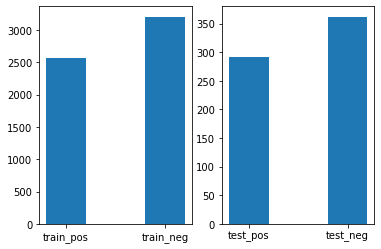

In [184]:
# training, testing data visualisation

labels_train = 'train_pos', 'train_neg'
sizes_train = [len(train_pos), len(train_neg)] 
plt.subplot(1, 2, 1)
plt.bar(labels_train, sizes_train, width = 0.4)

labels_test = 'test_pos', 'test_neg'
sizes_test = [len(test_pos), len(test_neg)] 
plt.subplot(1, 2, 2)
plt.bar(labels_test, sizes_test, width = 0.4)


### 1.2 introduce PyTorch

In [185]:
# uncomment to install pytorch
'''
%pip install torch
'''

'\n%pip install torch\n'

In [186]:
# hello pytorch!!
import torch

data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
print('PyTorch run successfully!' if type(x_data) == torch.Tensor else 'FAILED!')

PyTorch run successfully!


### 1.3 TF-IDF encoding

In [ ]:
# construct curpus from training/testing set
corpus = sum(all, [])
corpus_set = set(corpus)

print('total sentences: ', len(all))
print('total unique words: ', len(corpus_set))

total sentences:  6427
total unique words:  9835


In [ ]:
# create frequency dict
from collections import Counter

counter_corpus = Counter(corpus)

In [ ]:
# find the longest sentence
max_len = max([len(sen) for sen in all])
print('the longest sentence has', max_len, 'words')

the longest sentence has 25 words


In [ ]:
# term frequency (TF)
def tf(word, sentence):
    '''
        input:
            - word
            - sentence
        output:
            - tf of the word in the sentence
    '''
    len_sentence = len(sentence) #lenght of sentence
    
    counter_sentence = Counter(sentence)
    count_word = counter_sentence[word] # number of word occured in the sentence
    return count_word/len_sentence

In [ ]:
# inverse document frequency (IDF)
def idf(word):
    '''
        input:
            - word to count in corpus
        output:
            - idf of the word
    '''
    count_docs = len(all)
    count_sentence = len([sentence for sentence in all if word in sentence])
    return np.log(count_docs/(1.0+count_sentence) + 1.0)

In [ ]:
# TF-IDF encoding
def tf_idf(sentence):
    '''
        input:
            - data of sentences
        output:
            - tensor of encoded sentence
    '''
    words_enc = []
    for word in sentence:
        tf_ = tf(word, sentence)
        idf_ = idf(word)
        tfidf = tf_ * idf_
        words_enc.append(tfidf)
    return words_enc

In [ ]:
all_enc = []
for sentence in all:
    words_enc = tf_idf(sentence)
    if len(sentence) < max_len:
        for i in range(0, max_len - len(sentence)):
            words_enc.append(0.)
    all_enc.append(words_enc)

[[1.0007035658705785,
  2.0437939189772107,
  1.6280126722289663,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [2.4608636550049905,
  2.691809034527247,
  2.691809034527247,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [2.0188567758954354,
  1.917529382140889,
  1.845647741253743,
  2.0188567758954354,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [3.691295482507486,
  4.037713551790871,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [1.2410668923273727,
  1.0810938759926623,
  0.5926713301305307,
  1.1996321653797721,
  1.0953237013215158,
  0.0,
  0.0

In [ ]:
all_enc = torch.tensor(all_enc)
all_enc

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)
skl_output = vectorizer.transform(corpus)

In [ ]:
print(skl_output)

  (0, 1662)	1.0
  (1, 5114)	1.0
  (2, 7950)	1.0
  (3, 5430)	1.0
  (4, 894)	1.0
  (5, 1030)	1.0
  (6, 6877)	1.0
  (7, 4627)	1.0
  (8, 9457)	1.0
  (9, 5387)	1.0
  (10, 7655)	1.0
  (11, 6426)	1.0
  (12, 6951)	1.0
  (13, 1664)	1.0
  (14, 970)	1.0
  (15, 8289)	1.0
  (16, 7711)	1.0
  (17, 1231)	1.0
  (18, 1108)	1.0
  (19, 7888)	1.0
  (20, 4258)	1.0
  (21, 6314)	1.0
  (22, 2267)	1.0
  (23, 9420)	1.0
  (25, 1436)	1.0
  :	:
  (30211, 5943)	1.0
  (30212, 9394)	1.0
  (30213, 3924)	1.0
  (30214, 8764)	1.0
  (30215, 785)	1.0
  (30216, 9394)	1.0
  (30217, 8756)	1.0
  (30218, 7292)	1.0
  (30219, 5194)	1.0
  (30220, 8905)	1.0
  (30221, 9394)	1.0
  (30222, 3924)	1.0
  (30223, 4541)	1.0
  (30224, 7901)	1.0
  (30225, 8650)	1.0
  (30226, 4464)	1.0
  (30227, 7268)	1.0
  (30228, 5189)	1.0
  (30229, 8650)	1.0
  (30230, 9394)	1.0
  (30231, 1249)	1.0
  (30232, 8058)	1.0
  (30233, 5286)	1.0
  (30234, 4529)	1.0
  (30235, 8028)	1.0
